In [ ]:
#Eureka Snowpits
#Measuring the distribution of densities, temperatures and salinities throughout the snowpack
#Claude de Rijke-Thomas
#16th May 2022

In [1]:
icetype = 'fyi'  #the ice type that we want to be investigating (can either be fyi or myi)
from LPS_functions import *

In [2]:
def floatify(str):
    if str=="N/A" or str=='':
        return np.nan
    else:
        return float(str)

In [3]:
#Making empty arrays for the lat, lon distances from top of the snowpack, percentage distance through the ice from the top of the snowpack,
#and values for Density (g/cm^3), Salinity (ppt) and Temperature (°C):
Lat, Lon,D_per_fr_top,D_dist_fr_top,D_val,S_per_fr_top,S_dist_fr_top,S_val,T_per_fr_top,T_dist_fr_top,T_val = [],[], [],[],[],  [],[],[],  [],[],[]
with open('../OIB/19-21Apr2016/Pits/EurekaSnowpits.csv', 'r') as csvfile:
    #now I'm reading all lines in the csv in one go and adding them to an object (something that can hold them):
    readCSV = csv.DictReader(csvfile)
    #establishing the headers as the first line of the file:
    headers = readCSV.fieldnames
    print(headers)
    #looking at the csv file line by line:
    for line in readCSV:
        if line['IceType']==icetype:
            Lat.append(floatify(line['\ufeffLatitude']))
            Lon.append(floatify(line['Longitude']))
            D_per_fr_top.append(floatify(line['D % fr top']))
            D_dist_fr_top.append(floatify(line['D dist fr top (cm)']))
            D_val.append(floatify(line['D_tot (g/cm^3)']))

            S_per_fr_top.append(floatify(line['S % fr top']))
            S_dist_fr_top.append(floatify(line['S dist fr top (cm)']))
            S_val.append(floatify(line['S (ppt)']))

            T_per_fr_top.append(floatify(line['T % fr top']))
            T_dist_fr_top.append(floatify(line['T dist fr top (cm)']))
            T_val.append(floatify(line['Temp (Celcius)']))

['\ufeffLatitude', 'Longitude', 'Top (cm)', 'Bottom (cm)', 'D % fr top', 'D dist fr top (cm)', 'A (g/cm^3)', 'B (g/cm^3)', 'D_tot (g/cm^3)', 'S top (cm)', 'S bot (cm)', 'S % fr top', 'S dist fr top (cm)', 'S (ppt)', 'T H above ice (cm)', 'T % fr top', 'T dist fr top (cm)', 'Temp (Celcius)', 'Site', 'IceType']


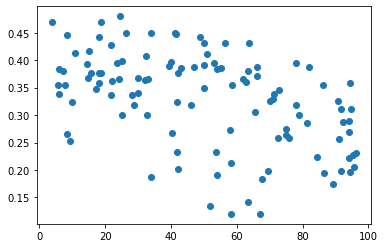

In [4]:
plt.scatter(D_per_fr_top,D_val )

/Users/claudederijkethomas/anaconda3/envs/icyenv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/claudederijkethomas/anaconda3/envs/icyenv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/claudederijkethomas/anaconda3/envs/icyenv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from r

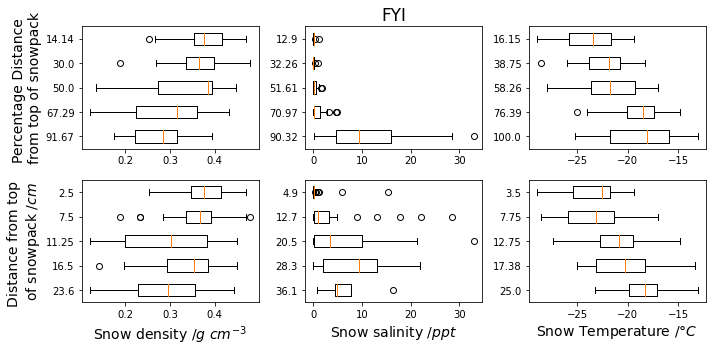

In [5]:
f, ((ax1, ax2,ax3),(ax4,ax5,ax6))= plt.subplots(2, 3, sharey=False, figsize=(10,5))
D_per_fr_top,D_dist_fr_top, D_val = np.array(D_per_fr_top), np.array(D_dist_fr_top),np.array(D_val)
D_xs_per_fr_top, D_ys_per_fr_top = nthTupleBoxPlotter(D_per_fr_top[~np.isnan(D_per_fr_top-D_val)], D_val[~np.isnan(D_per_fr_top-D_val)], 5)
D_xs_per_fr_top, D_ys_per_fr_top = nthTupleBoxPlotter(D_per_fr_top[~np.isnan(D_per_fr_top-D_val)], D_val[~np.isnan(D_per_fr_top-D_val)], 5)
D_xs_dist_fr_top, D_ys_dist_fr_top = nthTupleBoxPlotter(D_dist_fr_top[~np.isnan(D_dist_fr_top-D_val)], D_val[~np.isnan(D_dist_fr_top-D_val)], 5)

S_per_fr_top,S_dist_fr_top, S_val = np.array(S_per_fr_top), np.array(S_dist_fr_top),np.array(S_val)
S_xs_per_fr_top, S_ys_per_fr_top = nthTupleBoxPlotter(S_per_fr_top[~np.isnan(S_per_fr_top-S_val)], S_val[~np.isnan(S_per_fr_top-S_val)],5, percentiles=False)
S_xs_dist_fr_top, S_ys_dist_fr_top = nthTupleBoxPlotter(S_dist_fr_top[~np.isnan(S_dist_fr_top-S_val)], S_val[~np.isnan(S_dist_fr_top-S_val)],5, percentiles=False)

T_per_fr_top,T_dist_fr_top, T_val = np.array(T_per_fr_top), np.array(T_dist_fr_top),np.array(T_val)
T_xs_per_fr_top, T_ys_per_fr_top = nthTupleBoxPlotter(T_per_fr_top[~np.isnan(T_per_fr_top-T_val)], T_val[~np.isnan(T_per_fr_top-T_val)], 5)
T_xs_dist_fr_top, T_ys_dist_fr_top = nthTupleBoxPlotter(T_dist_fr_top[~np.isnan(T_dist_fr_top-T_val)], T_val[~np.isnan(T_dist_fr_top-T_val)], 5)

ax1.boxplot(D_ys_per_fr_top, vert=False); ax1.set_ylabel("Percentage Distance \nfrom top of snowpack", fontsize = 14)
ax1.invert_yaxis(); ax1.set_yticklabels(np.round(D_xs_per_fr_top,2))
ax4.boxplot(D_ys_dist_fr_top, vert=False);  ax4.set_ylabel("Distance from top \nof snowpack $/cm$", fontsize = 14)
ax4.invert_yaxis(); ax4.set_yticklabels(np.round(D_xs_dist_fr_top,2)); ax4.set_xlabel("Snow density $/g\ cm^{-3}$", fontsize = 14)

ax2.boxplot(S_ys_per_fr_top, vert=False);
ax2.invert_yaxis(); ax2.set_yticklabels(np.round(S_xs_per_fr_top,2))
ax5.boxplot(S_ys_dist_fr_top, vert=False); ax5.set_xlabel("Snow salinity $/ppt$", fontsize = 14)
ax5.invert_yaxis(); ax5.set_yticklabels(np.round(S_xs_dist_fr_top,2))

ax3.boxplot(T_ys_per_fr_top, vert=False);
ax3.invert_yaxis(); ax3.set_yticklabels(np.round(T_xs_per_fr_top,2))
ax6.boxplot(T_ys_dist_fr_top, vert=False); ax6.set_xlabel("Snow Temperature $/\degree C$", fontsize = 14)
ax6.invert_yaxis(); ax6.set_yticklabels(np.round(T_xs_dist_fr_top,2));
ax2.set_title(str(icetype).upper(), fontsize=17)
# ax2.set_title('FYI and MYI', fontsize=17)
plt.tight_layout()

# plt.savefig('../Thesis/graphics/SnowPitBoxPlots'+str(icetype)+'.png',dpi=200)

In [6]:
print(np.mean(fflat(S_ys_per_fr_top)))

4.112612612612612
